# *Reología.*
## Determinación del tipo de comportamiento reológico y de los parámetros del modelo potencial

In [1]:

#%matplotlib notebook

%matplotlib inline
import seaborn
import numpy as np
import matplotlib.pyplot as mpl
from scipy.optimize import curve_fit
import random
import math
import pandas as pd
import IPython.core.display as di
pd.set_option('display.notebook_repr_html', True)
import notebook
from IPython.display import clear_output, display, HTML, Image,Math, Latex
from IPython.external import mathjax
FigureSize=(15,5)




def ModeloPotencia(x, m,n):
    return m*x**n



def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)
     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    correlation = np.corrcoef(x, y)[0,1]


    results['correlation'] = correlation
    r_squared=correlation**2
    results['determination'] = correlation**2

    return r_squared,coeffs


def generador_parametros():  # generarción de parámetros del modelo potencial: m y n
    global m, n
    m = round(random.uniform(10., 1000.), 1)
    n = round(random.uniform(0.2, 1.4), 3)

    return m, n



def generador_valores(n_ptos):
    global m, n, tau, gamma
    m, n = generador_parametros()

    gamma0 = round(random.uniform(1., 10.))
    gamma_final = round(random.uniform(100., 1000.))

    gamma = np.linspace(gamma0, gamma_final, n_ptos)
    tau = (m+random.uniform(-0.02,0.02)*m)*gamma**(n+random.uniform(-0.02,0.02)*n)

    return tau, gamma,m,n


display(HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Mostrar código')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Esconder código')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Mostrar código"></form>'''))


display(HTML('<h1 style="color:#000000"><strong>Avanzar para generar datos</strong></h1>'))
display(HTML('<p>Recuerda cómo es el modelo reológico potencial:</br>  </p>' ))
display(Math(r'\tau=m\cdot \gamma^n'))
display(HTML('<p>donde $n$ es el índice de comportamiento y $m$ es el índice de consistencia. </br>  </p>' ))

<IPython.core.display.Math object>

In [2]:
n_ptos=int(input("Nº de puntos: "))

tau, gamma,m,n=generador_valores(n_ptos)

        
    
eta=m*gamma**(n-1)

tau1=np.copy(tau)
tau1= np.round(tau1,1)

gamma1=np.round(gamma,1)


data=dict()
data['Tensión (N·m2)']=tau1.tolist()
data['Velocidad de deformación (1/s)']=gamma1.tolist()


values = pd.DataFrame(data, columns=['Tensión (N·m2)', 'Velocidad de deformación (1/s)'])
#values.style.set_properties(**{'text-align': 'center'})
values.set_index('Tensión (N·m2)',inplace=True)
display(values)


display(HTML('<h1 style="color:#000000""><strong>Avanzar para mostrar representación gráfica</strong></h1>'))

Nº de puntos: 10


,Velocidad de deformación (1/s)
Tensión (N·m2),
885.9,5.0
13685.3,85.8
25929.9,166.6
37947.8,247.3
49818.9,328.1
61581.6,408.9
73258.2,489.7
84863.7,570.4
96408.4,651.2


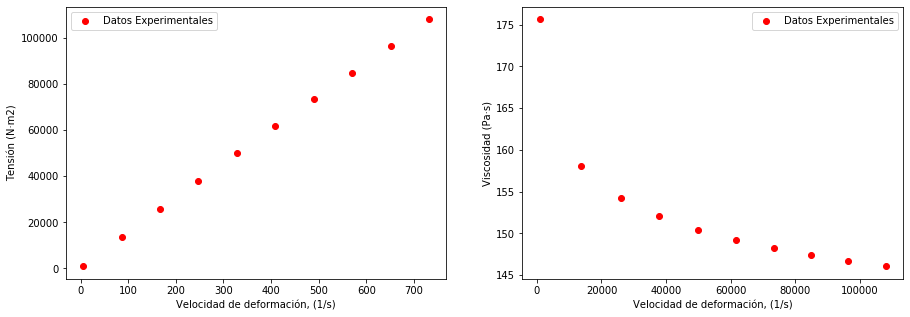

In [3]:

fig1=mpl.figure(figsize=FigureSize);

ax1 = fig1.add_subplot(121);
mpl.plot(gamma,tau, 'ro',label = 'Datos Experimentales')
mpl.xlabel('Velocidad de deformación, (1/s)')
mpl.ylabel('Tensión (N·m2)')
mpl.legend(loc = 'best')


ax2 = fig1.add_subplot(122);

mpl.plot(tau,eta, 'ro',label = 'Datos Experimentales')
mpl.xlabel('Velocidad de deformación, (1/s)')
mpl.ylabel('Viscosidad (Pa·s)')
mpl.legend(loc = 'best')
   
mpl.show()

display(HTML('<h1 style="color:#000000"><strong>Avanzar para mostrar representación en escala logarítmica </strong></h1>'))

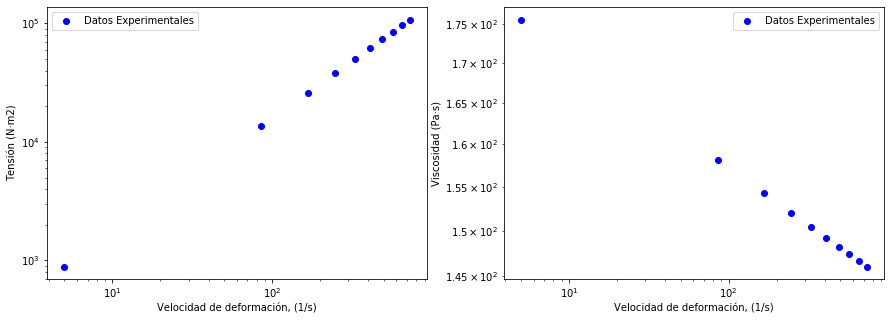

In [4]:


fig2=mpl.figure(figsize=FigureSize);

ax1 = fig2.add_subplot(121);
mpl.plot(gamma,tau, 'bo',label = 'Datos Experimentales')
mpl.xlabel('Velocidad de deformación, (1/s)')
mpl.ylabel('Tensión (N·m2)')
mpl.legend(loc = 'best')

mpl.yscale('log')
mpl.xscale('log')



ax2 = fig2.add_subplot(122);

mpl.plot(gamma, eta,'bo',label = 'Datos Experimentales')
mpl.xlabel('Velocidad de deformación, (1/s)')
mpl.ylabel('Viscosidad (Pa·s)')
mpl.legend(loc = 'best')
mpl.yscale('log')
mpl.xscale('log')


mpl.show()

display(HTML('<h1 style="color:#000000"><strong>Avanzar para mostrar ajuste del modelo potencial: parámetros reológicos </strong></h1>'))

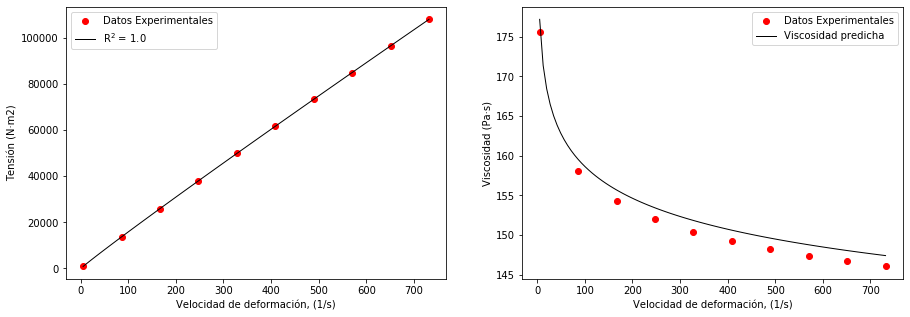

,m calculado,m generado,n calculado,n generado
Resultados,188.0,186.4,0.963,0.963


In [5]:

popt, pcov = curve_fit(ModeloPotencia, gamma, tau)
m_experimental=popt[0]
n_experimental=popt[1]
Predichos=ModeloPotencia(gamma, m_experimental,n_experimental) # Valores predichos por el modelo


perr = np.sqrt(np.diag(pcov)) #Error de cada uno de los parámetros del modelo: m y n
residuals = tau- Predichos # Residuo: Experimentales menos predichos
ss_res = np.sum(residuals**2) #SSresiduo: Suma del cuadrado de los residuos
ss_tot = np.sum((tau-np.mean(tau))**2) # Suma de cuadrados total
r_squared = 1 - (ss_res / ss_tot) # Cálculo de R2

#Representación Experimentales y predichos

gamma_100 = np.linspace(gamma[0], gamma[-1], 100)
tau_Predichos=ModeloPotencia(gamma_100, m_experimental,n_experimental) # Valores predichos  para 100 valores
Viscosidad_predicha=m_experimental*gamma_100**(n_experimental-1)

fig3=mpl.figure(figsize=FigureSize);

ax1 = fig3.add_subplot(121);
mpl.plot(gamma,tau, 'ro',label = 'Datos Experimentales')
mpl.plot(gamma_100,tau_Predichos, 'k-', linewidth = 1,label = '$\mathrm{R^2}$ = ' + str(round(r_squared, 3)))

mpl.xlabel('Velocidad de deformación, (1/s)')
mpl.ylabel('Tensión (N·m2)')
mpl.legend(loc = 'best')


ax2 = fig3.add_subplot(122);
mpl.plot(gamma,eta, 'ro',label = 'Datos Experimentales')
mpl.plot(gamma_100,Viscosidad_predicha, 'k-', linewidth = 1,label = 'Viscosidad predicha')
mpl.xlabel('Velocidad de deformación, (1/s)')
mpl.ylabel('Viscosidad (Pa·s)')
mpl.legend(loc = 'best')
   
mpl.show()

ResultadosNombres=['m calculado','m generado','n calculado','n generado']
ResultadosValores=[round(m_experimental, 1),round(m, 1),round(n_experimental, 3),round(n, 3)]

data1 = dict(zip(ResultadosNombres, ResultadosValores))
values1 = pd.DataFrame(data1,index=['Resultados'], columns=ResultadosNombres)
#values2.set_index('tiempo (min)',inplace=True)
display(values1)


In [6]:
display(HTML('''

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Programado con Jupyter Notebook en Python 3.6. </footer>'''))